# Домашняя задача № 1
# Катаев Денис
## Динамическое программирование
### Вариант № 5

In [682]:
%matplotlib inline

from __future__ import division

from IPython.display import Markdown
from math import trunc

import numpy as np
np.set_printoptions(linewidth=150)

import matplotlib
import matplotlib.pyplot as plt

bj = {0:[19] + [None] * 4}
a = [None, 4, 1, 2, 2]
c = [None, 3, 2, 3, 1.8]
xj = {0:[None, None, None, None, None]}

 ### Задача
 $$ Z = c_2x_2^{2} + \sum_{j=1,3,4}c_{j}x_{j} \longrightarrow \max $$
 
 при ограничениях:
 $$ \sum_{j=1}^{4}a_{j}x_{j} \leqslant b $$ $$ x>=0 $$ $$ x_1=>2 $$ $$ x_2 \leqslant 3 $$ $$ x - целое $$
 
 так же из задачи известно:
 $$ b_{j}=b_{j-1}-a_{j}x_{j}, (j=1,2,3,4) $$
 
 Шаг 1 $(b_3 -> b_4)$:
 
 
 Решается аналитически
 $$ f_1(b_3) = \max_{0 \leqslant x_4 \leqslant [\frac{b_3}{a_4}]} C_4 x_4 = 1.8 [\frac{b_3}{2}] $$
 где $$x_4 = [\frac{b_3}{2}]$$

In [683]:
def f1(xi, b3):
    if xi < 0 or xi > trunc(b3 / a[4]):
        return - np.inf
    return c[4] * trunc(b3 / a[4])
def get_f1(max_x=None, it=0):
    x = xj[it]
    b = bj[it]
    if max_x is None:
        max_x = int(trunc(b[3] / a[4]))
    result = np.zeros([b[0] + 1, max_x + 1], dtype=float)

    for b_ in xrange(result.shape[0]):
        for xi in xrange(result.shape[1]):
            result[b_][xi] = f1(xi, b_)

    b_, x4 = np.where(result == result.max())
    x[4] = x4.max()
    if result.shape[1] > 10:
        print result[:,range(10)]
    else:
        print result[:]
    print u'max x4: %s, max b3: %s, f1 max: %s' % (x[4], b_, result.max())
    plt.imshow(result)
    plt.ylabel('x4')
    plt.xlabel('b3')
    plt.show()
    return Markdown(u"Для дальнейших расчетов примем $x_4^{%s} = %s$" % (it, x[1]))

Шаг 2 $(b_2 -> b_3)$:

$$ f_2(b_2) = \max_{0 \leqslant x_3 \leqslant [\frac{b_2}{a_3}]}(C_3x_3 + f_1(b_3))$$
где $$ b_3 = b_2-a_3x_3$$
что значит:
$$ f_2(b_2) =
\max_{0 \leqslant x_3 \leqslant [\frac{b_2}{a_3}]}(C_3x_3 + C_4 [\frac{b_2 - a_3x_3}{a_4}]) =
\max_{ 0  \leqslant  x_3  \leqslant  [\frac{b_2}{2} ]}( 3 x_3+1.8[ \frac{b_2 - 2x_3}{2} ] )  $$

Выполним табулирование функции $f_2(b_2)$


[[  0.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  0.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  1.8   3.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  1.8   3.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  3.6   4.8   6.   -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  3.6   4.8   6.   -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  5.4   6.6   7.8   9.   -inf  -inf  -inf  -inf  -inf  -inf]
 [  5.4   6.6   7.8   9.   -inf  -inf  -inf  -inf  -inf  -inf]
 [  7.2   8.4   9.6  10.8  12.   -inf  -inf  -inf  -inf  -inf]
 [  7.2   8.4   9.6  10.8  12.   -inf  -inf  -inf  -inf  -inf]
 [  9.   10.2  11.4  12.6  13.8  15.   -inf  -inf  -inf  -inf]
 [  9.   10.2  11.4  12.6  13.8  15.   -inf  -inf  -inf  -inf]
 [ 10.8  12.   13.2  14.4  15.6  16.8  18.   -inf  -inf  -inf]
 [ 10.8  12.   13.2  14.4  15.6  16.8  18.   -inf  -inf  -inf]
 [ 12.6  13.8  15.   16.2  17.4  18.6  19.8  21.   -inf  -inf]
 [ 12.6  13.8  15.   16.2  17.4  18.6  19.8  21.   -inf

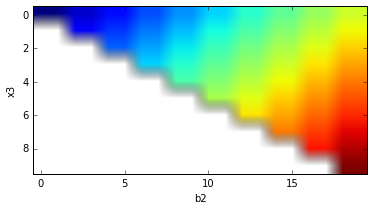

Для дальнейших расчетов примем $x_{3}^{0} = 9$

In [684]:
def get_f2(max_x=None, it=0):
    x = xj[it]
    b = bj[it]
    if max_x is None:
        max_x = int(trunc(b[0] / a[3]))
    def f2(xi, b2):
        if xi > trunc(b2 / a[3]):
            return - np.inf
        return c[3] * xi + c[4] * trunc((b2 - a[3] * xi) / a[4])
    result = np.zeros([b[0] + 1, max_x + 1], dtype=float)

    for b_ in xrange(result.shape[0]):
        for xi in xrange(result.shape[1]):
            result[b_][xi] = f2(xi, b_)

    b_, x3 = np.where(result == result.max())
    x[3] = x3.max()
    if result.shape[1] > 12:
        print result[:,range(12)]
    else:
        print result[:]
    print u'max x3: %s, max b2: %s, f2 max: %s' % (x[3], b_, result.max())
    plt.imshow(result.T)
    plt.ylabel('x3')
    plt.xlabel('b2')
    plt.show()
    return Markdown(u"Для дальнейших расчетов примем $x_{3}^{%s} = %s$" % (it, x[3]))
get_f2()

Шаг 3 $(b_1 -> b_2)$:

$$ f_3(b_1) =
\max_{0 \leqslant x_2 \leqslant [\frac{b_1}{a_2}] \leqslant 3}
    (C_2x_2^{2} + f_2(b_2)) =
\max_{0 \leqslant x_2 \leqslant [b_1] \leqslant 3}
    (C_2x_2^{2} + f_2(b_1-a_2x_2)) =
\max_{0 \leqslant x_2 \leqslant [b_1] \leqslant 3}
    2x_2^{2} + 3 * 9 +1.8[ \frac{b_1 - 3 * 9}{2} ]
$$

[[ 10.8  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ 12.6  14.6  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ 12.6  14.6  20.6  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ 14.4  16.4  22.4  32.4  -inf  -inf  -inf  -inf  -inf  -inf]
 [ 14.4  16.4  22.4  32.4  -inf  -inf  -inf  -inf  -inf  -inf]
 [ 16.2  18.2  24.2  34.2  -inf  -inf  -inf  -inf  -inf  -inf]
 [ 16.2  18.2  24.2  34.2  -inf  -inf  -inf  -inf  -inf  -inf]
 [ 18.   20.   26.   36.   -inf  -inf  -inf  -inf  -inf  -inf]
 [ 18.   20.   26.   36.   -inf  -inf  -inf  -inf  -inf  -inf]
 [ 19.8  21.8  27.8  37.8  -inf  -inf  -inf  -inf  -inf  -inf]
 [ 19.8  21.8  27.8  37.8  -inf  -inf  -inf  -inf  -inf  -inf]
 [ 21.6  23.6  29.6  39.6  -inf  -inf  -inf  -inf  -inf  -inf]
 [ 21.6  23.6  29.6  39.6  -inf  -inf  -inf  -inf  -inf  -inf]
 [ 23.4  25.4  31.4  41.4  -inf  -inf  -inf  -inf  -inf  -inf]
 [ 23.4  25.4  31.4  41.4  -inf  -inf  -inf  -inf  -inf  -inf]
 [ 25.2  27.2  33.2  43.2  -inf  -inf  -inf  -inf  -inf

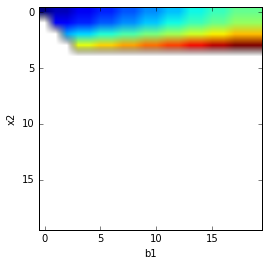

Для дальнейших расчетов примем $x_{2}^{0} = 3$

In [685]:
def f3(x, xi, b1):
    if xi > b1 / a[2] or xi > 3:
        return - np.inf
    return c[2] * xi ** 2 + c[3] * x[3] + c[4] * trunc((b1 - a[3] * x[3]) / a[4])


def get_f3(max_x=None, it=0):
    x = xj[it]
    b = bj[it]
    if max_x is None:
        max_x = int(trunc(b[0] / a[2]))
    result = np.zeros([b[0] + 1, max_x + 1], dtype=float)
    for b_ in xrange(result.shape[0]):
        for xi in xrange(result.shape[1]):
            result[b_][xi] = f3(x, xi, b_)
    b_, x2 = np.where(result == result.max())
    x[2] = x2.max()
    if result.shape[1] > 10:
        print result[:,range(10)]
    else:
        print result[:]
    print u'max x2: %s, max b1: %s, max f3: %s' % (x[2], b_, result.max())
    plt.imshow(result.T)
    plt.ylabel('x2')
    plt.xlabel('b1')
    plt.show()
    return Markdown(u"Для дальнейших расчетов примем $x_{2}^{%s} = %s$" % (it, x[2]))
get_f3()

Шаг 4 $(b_{0} -> b_{1})$:

где $$ b_{1} = b_{0}-a_{1}x_{1}$$

$$ f_{4}(b_{0}) =
\max_{2 \leqslant x_1 \leqslant [\frac{b_0}{a_1}]} (C_1x_1 + f_3(b_1)) =
\max_{2 \leqslant x_1 \leqslant [\frac{b_0}{a_1}]} (C_1x_1 + f_3(b_0-a_1x_1))$$


[[ -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  38.4  -inf  -inf]
 [ -inf  -inf  38.4  -inf  -inf]
 [ -inf  -inf  40.2  -inf  -inf]
 [ -inf  -inf  40.2  -inf  -inf]
 [ -inf  -inf  42.   41.4  -inf]
 [ -inf  -inf  42.   41.4  -inf]
 [ -inf  -inf  43.8  43.2  -inf]
 [ -inf  -inf  43.8  43.2  -inf]
 [ -inf  -inf  45.6  45.   44.4]]
max x1: 2, max b0: [19], max f3: 45.6


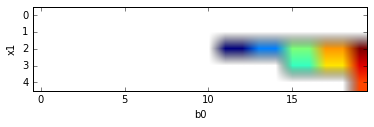

Для дальнейших расчетов примем $x_{1}^{0} = 2$

In [686]:
def f4(x, xi, b0):
    if xi < 2 or xi > trunc(b0 / a[1]):
        return - np.inf
    return c[1] * xi + f3(x, x[2], b0 - a[1] * xi)


def get_f4(max_x=None, it=0):
    x = xj[it]
    b = bj[it]
    if max_x is None:
        max_x = int(trunc(b[0] / a[1]))
    result = np.zeros([b[0] + 1, max_x + 1], dtype=float)
    for b_ in xrange(result.shape[0]):
        for xi in xrange(result.shape[1]):
            result[b_][xi] = f4(x, xi, b_)
    b_, x1 = np.where(result == result.max())
    x[1] = x1.max()
    if result.shape[1] > 10:
        print result[:,range(10)]
    else:
        print result[:]
    print u'max x1: %s, max b0: %s, max f3: %s' % (x[1], b_, result.max())
    plt.imshow(result.T)
    plt.ylabel('x1')
    plt.xlabel('b0')
    plt.show()
    return Markdown(u"Для дальнейших расчетов примем $x_{1}^{%s} = %s$" % (it, x[1]))
get_f4()

Выпишим результаты проделанных шагов:

1. $ f_{1}(b_{3}) = 1.8 [\frac{b_{3}}{2}]$, при $ x_{4}^{0} = \frac{b_{3}}{2} $
2. $ f_{2}(b_{2}) = 3 x_{3}+1.8[ \frac{b_{2} - 2x_{3}}{2} ] $, при $ x_{3}^{0} = 9 $
3. $ f_{3}(b_{1}) = 2 x_{2}^{2} + 3 * 9 +1.8[ \frac{b_{1} - 3 * 9}{2} ] $, при $x_{2}^{0} = 3 $
4. $ f_{4}(b_{0}) = 46.2 $, при $x_{1}^{0} = 2 $

Выполним перерасчет результатов $ b_{j} $ выполняя последовательно шаги 1-4.

In [687]:
def get_b(it, j, b, x, a):
    try:
        return b[j - 1] - a[j] * x[j]
    except TypeError:
        return - np.inf

x_limits = [None,
    lambda b, x, a: 2 <= x[1] <= trunc(b[0] / a[1]),
    lambda b, x, a: 0 <= x[2] <= trunc(b[1] / a[2]) and x[2] <= 3,
    lambda b, x, a: 0 <= x[3] <= trunc(b[2] / a[3]),
    lambda b, x, a: 0 <= x[4] <= trunc(b[3] / a[4])
]
def recalculate(it=0):
    b = bj[it]
    x = xj[it]
    for i in range(1, 5):
        value = get_b(it, i, b, x, a)
        if value >= 0:
            b[i] = value
        else:
            b[i] = - np.inf
def get_z(x):
    return c[1] * x[1] + c[2] * x[2] * x[2] + x[3] * c[3] + x[4] * c[4]
        
def check(it=0):
    b = bj[it]
    x = xj[it]
    fail = False
    for i in range(1, 5):
        value = b[i]
        if value is None or value < 0:
            break
        if not x_limits[i](b, x, a):
            yield u"""Шаг %(i)s при $x_%(i)s^%(it)s = %(x)s, \\quad x_%(i)s $ не удовлетворяет требованию $x_%(i)s \\leqslant [\\frac{b_%(b)s}{a_%(i)s}]$ """ % {'i': i, 'b':i-1, 'it':it, 'x':x[i]}
            break
    else:
        fail = True
        yield u""" Шаг %(i)s при $ x_%(i)s^%(it)s = %(x)s, \\quad b_%(i)s = b_%(b)s - a_%(i)s x_%(i)s^%(it)s = %(vb)s - %(va)s*%(vx)s = %(value)s $""" % {'i': i, 'vb':b[i-1], 'va':a[i], 'vx':x[i], 'it': it, 'x': xj[it][i], 'b':i-1, 'value':value}

    if not fail and all(x_ is not None and x_ >= 0 for x_ in b[1:]):
        z = get_z(x)
        if z > 0:
            yield u""" Значение целевой функции $ Z(x) = %(z)s $ """ % {'z':z, 'it':it}
    
Markdown(u'\n\n'.join(check()))

### Возвращяемся на шаг 2, возмем $x_2^1 = 2$

[[  0.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  0.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  1.8   3.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  1.8   3.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  3.6   4.8   6.   -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  3.6   4.8   6.   -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  5.4   6.6   7.8   9.   -inf  -inf  -inf  -inf  -inf  -inf]
 [  5.4   6.6   7.8   9.   -inf  -inf  -inf  -inf  -inf  -inf]
 [  7.2   8.4   9.6  10.8  12.   -inf  -inf  -inf  -inf  -inf]
 [  7.2   8.4   9.6  10.8  12.   -inf  -inf  -inf  -inf  -inf]
 [  9.   10.2  11.4  12.6  13.8  15.   -inf  -inf  -inf  -inf]
 [  9.   10.2  11.4  12.6  13.8  15.   -inf  -inf  -inf  -inf]
 [ 10.8  12.   13.2  14.4  15.6  16.8  18.   -inf  -inf  -inf]
 [ 10.8  12.   13.2  14.4  15.6  16.8  18.   -inf  -inf  -inf]
 [ 12.6  13.8  15.   16.2  17.4  18.6  19.8  21.   -inf  -inf]
 [ 12.6  13.8  15.   16.2  17.4  18.6  19.8  21.   -inf

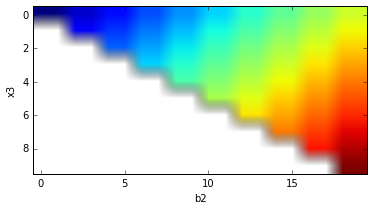

[[ 10.8  -inf  -inf]
 [ 12.6  14.6  -inf]
 [ 12.6  14.6  20.6]
 [ 14.4  16.4  22.4]
 [ 14.4  16.4  22.4]
 [ 16.2  18.2  24.2]
 [ 16.2  18.2  24.2]
 [ 18.   20.   26. ]
 [ 18.   20.   26. ]
 [ 19.8  21.8  27.8]
 [ 19.8  21.8  27.8]
 [ 21.6  23.6  29.6]
 [ 21.6  23.6  29.6]
 [ 23.4  25.4  31.4]
 [ 23.4  25.4  31.4]
 [ 25.2  27.2  33.2]
 [ 25.2  27.2  33.2]
 [ 27.   29.   35. ]
 [ 27.   29.   35. ]
 [ 27.   29.   35. ]]
max x2: 2, max b1: [17 18 19], max f3: 35.0


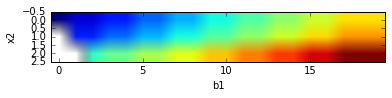

In [688]:
milistone = 1
bj[milistone] = ([None] * 5)
xj[milistone] = ([None] * 5)
bj[milistone][0] = bj[0][0]
xj[milistone][1] = xj[0][1]
get_f2(it=milistone)
get_f3(2, it=milistone)
recalculate(milistone)
Markdown(u'\n\n'.join(check(milistone)))

### Возвращяемся на шаг 2, возмем $x_2^2 = 1$

[[  0.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  0.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  1.8   3.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  1.8   3.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  3.6   4.8   6.   -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  3.6   4.8   6.   -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  5.4   6.6   7.8   9.   -inf  -inf  -inf  -inf  -inf  -inf]
 [  5.4   6.6   7.8   9.   -inf  -inf  -inf  -inf  -inf  -inf]
 [  7.2   8.4   9.6  10.8  12.   -inf  -inf  -inf  -inf  -inf]
 [  7.2   8.4   9.6  10.8  12.   -inf  -inf  -inf  -inf  -inf]
 [  9.   10.2  11.4  12.6  13.8  15.   -inf  -inf  -inf  -inf]
 [  9.   10.2  11.4  12.6  13.8  15.   -inf  -inf  -inf  -inf]
 [ 10.8  12.   13.2  14.4  15.6  16.8  18.   -inf  -inf  -inf]
 [ 10.8  12.   13.2  14.4  15.6  16.8  18.   -inf  -inf  -inf]
 [ 12.6  13.8  15.   16.2  17.4  18.6  19.8  21.   -inf  -inf]
 [ 12.6  13.8  15.   16.2  17.4  18.6  19.8  21.   -inf

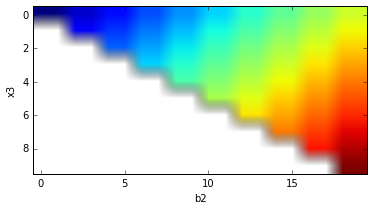

[[ 10.8  -inf]
 [ 12.6  14.6]
 [ 12.6  14.6]
 [ 14.4  16.4]
 [ 14.4  16.4]
 [ 16.2  18.2]
 [ 16.2  18.2]
 [ 18.   20. ]
 [ 18.   20. ]
 [ 19.8  21.8]
 [ 19.8  21.8]
 [ 21.6  23.6]
 [ 21.6  23.6]
 [ 23.4  25.4]
 [ 23.4  25.4]
 [ 25.2  27.2]
 [ 25.2  27.2]
 [ 27.   29. ]
 [ 27.   29. ]
 [ 27.   29. ]]
max x2: 1, max b1: [17 18 19], max f3: 29.0


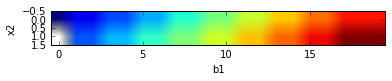

In [689]:
milistone = 2
bj[milistone] = ([None] * 5)
xj[milistone] = ([None] * 5)
bj[milistone][0] = bj[0][0]
xj[milistone][1] = xj[0][1]
get_f2(it=milistone)
get_f3(1, it=milistone)
recalculate(milistone)
Markdown(u'\n\n'.join(check(milistone)))

### Возвращяемся на шаг 2, возмем $x_2^3 = 0$

[[  0.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  0.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  1.8   3.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  1.8   3.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  3.6   4.8   6.   -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  3.6   4.8   6.   -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  5.4   6.6   7.8   9.   -inf  -inf  -inf  -inf  -inf  -inf]
 [  5.4   6.6   7.8   9.   -inf  -inf  -inf  -inf  -inf  -inf]
 [  7.2   8.4   9.6  10.8  12.   -inf  -inf  -inf  -inf  -inf]
 [  7.2   8.4   9.6  10.8  12.   -inf  -inf  -inf  -inf  -inf]
 [  9.   10.2  11.4  12.6  13.8  15.   -inf  -inf  -inf  -inf]
 [  9.   10.2  11.4  12.6  13.8  15.   -inf  -inf  -inf  -inf]
 [ 10.8  12.   13.2  14.4  15.6  16.8  18.   -inf  -inf  -inf]
 [ 10.8  12.   13.2  14.4  15.6  16.8  18.   -inf  -inf  -inf]
 [ 12.6  13.8  15.   16.2  17.4  18.6  19.8  21.   -inf  -inf]
 [ 12.6  13.8  15.   16.2  17.4  18.6  19.8  21.   -inf

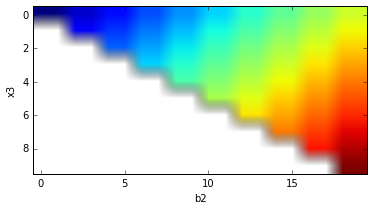

[[ 10.8]
 [ 12.6]
 [ 12.6]
 [ 14.4]
 [ 14.4]
 [ 16.2]
 [ 16.2]
 [ 18. ]
 [ 18. ]
 [ 19.8]
 [ 19.8]
 [ 21.6]
 [ 21.6]
 [ 23.4]
 [ 23.4]
 [ 25.2]
 [ 25.2]
 [ 27. ]
 [ 27. ]
 [ 27. ]]
max x2: 0, max b1: [17 18 19], max f3: 27.0


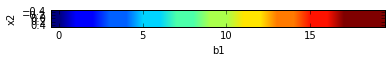

[[ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  16.8]
 [ -inf  -inf  18.6]
 [ -inf  -inf  18.6]
 [ -inf  -inf  20.4]
 [ -inf  -inf  20.4]
 [ -inf  -inf  22.2]
 [ -inf  -inf  22.2]
 [ -inf  -inf  24. ]
 [ -inf  -inf  24. ]
 [ -inf  -inf  25.8]
 [ -inf  -inf  25.8]
 [ -inf  -inf  27.6]]
max x1: 2, max b0: [19], max f3: 27.6


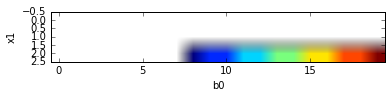

In [690]:
milistone = 3
bj[milistone] = ([None] * 5)
xj[milistone] = ([None] * 5)
bj[milistone][0] = bj[0][0]
xj[milistone][1] = xj[0][1]
get_f2(it=milistone)
get_f3(0, it=milistone)
get_f4(2, it=milistone)
recalculate(milistone)
Markdown(u'\n\n'.join(check(milistone)))

### Возвращяемся на шаг 1, возмем $x_1^4 = 1$

[[  0.   -inf  -inf  -inf  -inf]
 [  0.   -inf  -inf  -inf  -inf]
 [  1.8   3.   -inf  -inf  -inf]
 [  1.8   3.   -inf  -inf  -inf]
 [  3.6   4.8   6.   -inf  -inf]
 [  3.6   4.8   6.   -inf  -inf]
 [  5.4   6.6   7.8   9.   -inf]
 [  5.4   6.6   7.8   9.   -inf]
 [  7.2   8.4   9.6  10.8  12. ]
 [  7.2   8.4   9.6  10.8  12. ]
 [  9.   10.2  11.4  12.6  13.8]
 [  9.   10.2  11.4  12.6  13.8]
 [ 10.8  12.   13.2  14.4  15.6]
 [ 10.8  12.   13.2  14.4  15.6]
 [ 12.6  13.8  15.   16.2  17.4]
 [ 12.6  13.8  15.   16.2  17.4]
 [ 14.4  15.6  16.8  18.   19.2]
 [ 14.4  15.6  16.8  18.   19.2]
 [ 16.2  17.4  18.6  19.8  21. ]
 [ 16.2  17.4  18.6  19.8  21. ]]
max x3: 4, max b2: [18 19], f2 max: 21.0


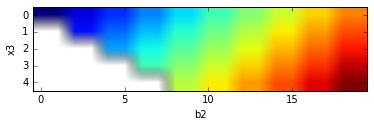

[[  4.8  -inf  -inf  -inf]
 [  6.6   8.6  -inf  -inf]
 [  6.6   8.6  14.6  -inf]
 [  8.4  10.4  16.4  26.4]
 [  8.4  10.4  16.4  26.4]
 [ 10.2  12.2  18.2  28.2]
 [ 10.2  12.2  18.2  28.2]
 [ 12.   14.   20.   30. ]
 [ 12.   14.   20.   30. ]
 [ 12.   14.   20.   30. ]
 [ 13.8  15.8  21.8  31.8]
 [ 13.8  15.8  21.8  31.8]
 [ 15.6  17.6  23.6  33.6]
 [ 15.6  17.6  23.6  33.6]
 [ 17.4  19.4  25.4  35.4]
 [ 17.4  19.4  25.4  35.4]
 [ 19.2  21.2  27.2  37.2]
 [ 19.2  21.2  27.2  37.2]
 [ 21.   23.   29.   39. ]
 [ 21.   23.   29.   39. ]]
max x2: 3, max b1: [18 19], max f3: 39.0


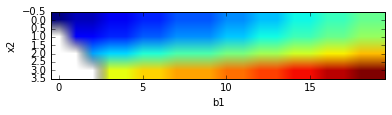

[[ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  -inf]
 [ -inf  -inf  32.4]
 [ -inf  -inf  32.4]
 [ -inf  -inf  34.2]
 [ -inf  -inf  34.2]
 [ -inf  -inf  36. ]
 [ -inf  -inf  36. ]
 [ -inf  -inf  36. ]
 [ -inf  -inf  37.8]
 [ -inf  -inf  37.8]]
max x1: 2, max b0: [18 19], max f3: 37.8


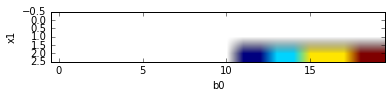

[None, 2, 3, 4, None]
[19, None, None, None, None]
[None, 2, 3, 4, None]
[19, 11, 8, 0, -inf]
[[  0. ]
 [  0. ]
 [  1.8]
 [  1.8]
 [  3.6]
 [  3.6]
 [  5.4]
 [  5.4]
 [  7.2]
 [  7.2]
 [  9. ]
 [  9. ]
 [ 10.8]
 [ 10.8]
 [ 12.6]
 [ 12.6]
 [ 14.4]
 [ 14.4]
 [ 16.2]
 [ 16.2]]
max x4: 0, max b3: [18 19], f1 max: 16.2


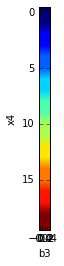

 Шаг 4 при $ x_4^4 = 0, \quad b_4 = b_3 - a_4 x_4^4 = 0 - 2*0 = 0 $

In [691]:
milistone = 4
bj[milistone] = ([None] * 5)
xj[milistone] = ([None] * 5)
bj[milistone][0] = bj[0][0]
xj[milistone][1] = xj[0][1]

get_f2(4, it=milistone) # x3
get_f3(3, it=milistone) # x2
get_f4(2, it=milistone) # x1
print xj[milistone]
print bj[milistone]
recalculate(milistone)
print xj[milistone]
print bj[milistone]

get_f1(it=milistone)
recalculate(milistone)
Markdown(u'\n\n'.join(check(milistone)))

In [692]:
import itertools
xj = {}
bj = {}
m = 0
for i, x in enumerate(itertools.product(range(10), repeat=4)):
    xj[i] = [None] + list(x)
    bj[i] = [19] + [None] * 4
    recalculate(i)
    if len(tuple(check(i))) == 5:
        if get_z(xj[i]) > m:
            m = get_z(xj[i])

            if m >= 23:
                print m, xj[i], bj[i]
                print 'kek'
